In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [13]:
from src.logic.functions import OneArgFunction

Используется метод трапеций 

![Метод трапеций](https://wikimedia.org/api/rest_v1/media/math/render/svg/b775acb091ee2e332a0d633040a06d9814b5d3bd)

Формула для всего отрезка

![Формула для всего отрезка](https://wikimedia.org/api/rest_v1/media/math/render/svg/1c7314766a21537e0c72d244ee6fc77a28decd05)

Погрешность метода

![Погрешность метода](https://wikimedia.org/api/rest_v1/media/math/render/svg/d72ebce436216c6c9aeb34c1cc39f772184c1336)

# Гладкая

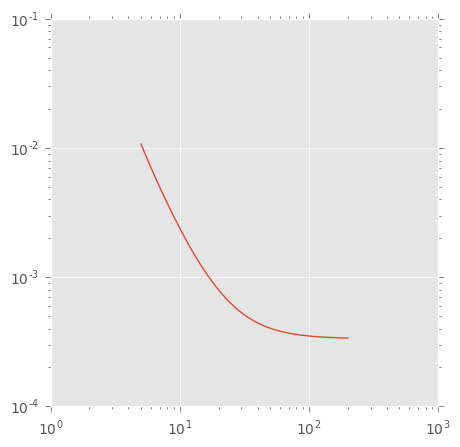

In [14]:
point_counts = []
integral_values = []
for points_count in range(5, 201):
    func = OneArgFunction(str_func='x^2', arg='x', begin=0, end=1, points_count=points_count)
    point_counts.append(points_count)
    integral_values.append(abs(0.333 - func.integrate()))

plt.figure(figsize=(5, 5))
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.plot(point_counts, integral_values)

In [15]:
func = OneArgFunction(str_func='x^2', arg='x', begin=0, end=1, points_count=points_count)
abs(0.333 - func.integrate())

0.000337541981263068

# Прерывная

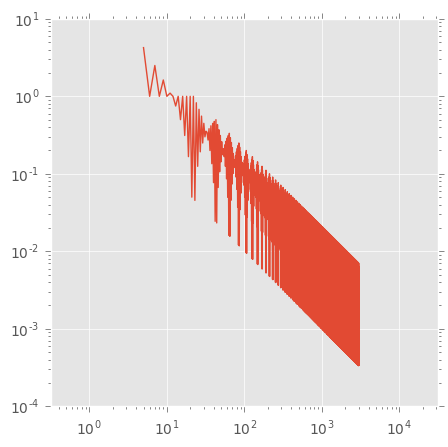

In [22]:
point_counts = []
integral_values = []
for points_count in range(5, 3001):
    arg_vals = [(x, 1) if x > 0 else (x, -1) for x in np.linspace(-10, 11, points_count)]
    func = OneArgFunction(arg_vals=arg_vals)
    point_counts.append(points_count)
    integral_values.append(abs(1 - func.integrate()))

plt.figure(figsize=(5, 5))
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.plot(point_counts, integral_values)

In [23]:
arg_vals = [(x, 1) if x > 0 else (x, -1) for x in np.linspace(-10, 11, points_count)]
func = OneArgFunction(arg_vals=arg_vals)
abs(1 - func.integrate())

0.0056685561853946353

# Осцелирующая

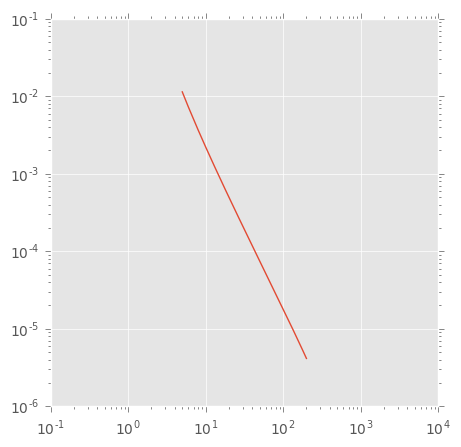

In [18]:
point_counts = []
integral_values = []
for points_count in range(5, 201):
    func = OneArgFunction(str_func='2sin(x^2)', arg='x', begin=0, end=1, points_count=points_count)
    point_counts.append(points_count)
    integral_values.append(abs(0.620537 - func.integrate()))

plt.figure(figsize=(5, 5))
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.plot(point_counts, integral_values)

In [19]:
func = OneArgFunction(str_func='2sin(x^2)', arg='x', begin=0, end=1, points_count=points_count)
abs(0.620537 - func.integrate())

4.15135666653743e-6